In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.python.keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

In [82]:
X, y = make_blobs(n_samples = 2000, n_features = 2, centers = 3, cluster_std = 1, random_state = 0)
X = pd.DataFrame(X, columns = ['x1', 'x2'])
y = pd.DataFrame(y, columns = ['target'])

data = pd.concat([X, y], axis = 1)
data.to_csv('data.csv', index = False)

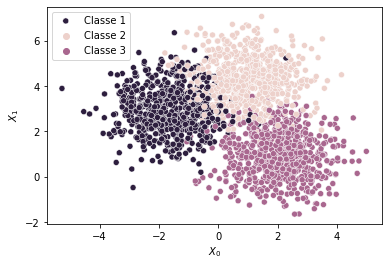

In [86]:
sns.scatterplot(x = 'x1', y = 'x2', data = data, hue = 'target')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend([f'Classe {x}' for x in range(1, y.nunique()[0] + 1)])

plt.savefig('images/plotq1a')
plt.show()

In [74]:
y_cat = to_categorical(y)

In [75]:
X_new, X_test, y_new, y_test =  train_test_split(X, y_cat, test_size = 0.2, random_state = 0)

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y_new, test_size = 0.25, random_state = 0)

In [164]:
def plot_loss_accuracy(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Valor da função erro')
    plt.ylabel('Função erro')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='best')
    plt.savefig('images/plotq1b')
    plt.show()
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Acurácia do modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Épocas')
    plt.legend(['Treino', 'Validação'], loc='best')
    plt.savefig('images/plotq1c')
    plt.show()

In [104]:
y[y['target'] == 2].count()

target    666
dtype: int64

In [78]:
def define_model(neurons):
    
    model = models.Sequential()
    model.add(layers.Dense(neurons, activation = 'relu', input_dim = X_train.shape[1]))
    model.add(layers.Dense(neurons, activation = 'relu'))
    model.add(layers.Dense(y_cat.shape[1], activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    return model

In [ ]:
history_dict = {}

for neurons in [2, 5, 10, 15, 20]:
    model = define_model(neurons)
    es = EarlyStopping(patience = 30, restore_best_weights = True)
    
    print(neurons)
    history_dict[neurons] = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 300, verbose = .1, callbacks = [es])
    history_dict[f'model_{neurons}'] = model

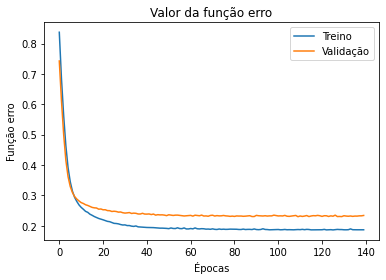

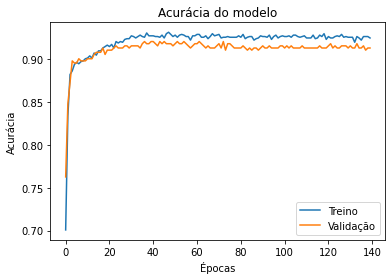

In [165]:
plot_loss_accuracy(history_dict[10])

In [144]:
y_pred = np.argmax(history_dict['model_10'].predict(X_test), axis = -1)
y_ori = np.argmax(y_test, axis = -1)
confusion_matrix(y_ori, y_pred)

array([[131,   2,   7],
       [  2, 121,   0],
       [  8,   1, 128]])

In [145]:
history_dict['model_10'].evaluate(X_test, y_test)[1]

13/13 [==============================] - 0s 4ms/step - loss: 0.1498 - accuracy: 0.9500


0.949999988079071

In [152]:
(y_ori == 2).sum()

137

In [162]:
len(history_dict[10].history['accuracy'])

140